<a href="https://colab.research.google.com/github/aminayusif/Cyber-Guard/blob/main/CyberGuard_Machine_Learning_for_Cyberattack_Detection_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

In today’s digital era, cyber threats are evolving rapidly, making traditional defense mechanisms increasingly inadequate. Organizations are now seeking intelligent, data-driven solutions to identify, classify, and mitigate cybersecurity threats in real time. This project, titled "CyberGuard: Machine Learning for Cyberattack Detection and Classification," applies machine learning (ML) techniques to network and system-level data to automatically detect and classify different types of cyberattacks.

The dataset used contains 40,000 labeled records of cybersecurity events, including features such as IP addresses, ports, protocols, payload data, anomaly scores, and metadata from firewall and intrusion detection systems. The primary objective is to develop a classification model that can predict the attack type based on these features, and optionally assess its severity level.

The project follows a complete ML pipeline, beginning with exploratory data analysis (EDA) to uncover patterns in attack behavior, protocol usage, and severity trends. In the data preprocessing phase, we handle missing values (particularly in logs such as IDS alerts and proxy information), encode categorical variables, and reduce high-cardinality fields that may lead to overfitting.

Feature engineering includes transforming timestamps into useful temporal features, encoding traffic types and protocols, and identifying significant indicators from anomaly scores. We then experiment with multiple supervised classification algorithms such as Random Forest, Logistic Regression, and Gradient Boosting, using grid search and cross-validation for optimization.

Model evaluation is conducted using metrics like accuracy, precision, recall, F1 score, and ROC-AUC. Confusion matrices and error analysis help interpret the model's performance and pinpoint common misclassifications, aiding in iterative improvements.

The final output is a trained ML model capable of identifying and classifying cyberattacks, which could be integrated into security systems for automated detection. The project not only demonstrates the practical use of machine learning in cybersecurity but also highlights the importance of combining domain knowledge with data science to build intelligent defense mechanisms.

This solution can help cybersecurity teams improve response times, reduce false positives, and better allocate resources in the face of increasingly sophisticated threats.

## Objectives

- Perform exploratory data analysis (EDA) on cybersecurity logs
- Clean and preprocess high-volume network data
- Engineer relevant features from raw logs
- Train and evaluate machine learning models to detect and classify attack types
- Analyze model performance using metrics and error analysis


## Exploratory Data Analysis and Data Preprocessing

### Import common libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Overview

 The dataset for this case study is provided in the file cybersecurity_attacks.csv
 and contains approximately 40,000 records. The key attributes include IP addresses, protocol, ports, payload data, anomaly scores, attack type

**Network activity** : IP, Port, Protocol, Packet Length

**System-level data** : User Info, Device Info, Geo-location

**Security-specific logs** : Anomaly Scores, Firewall Logs, Attack Signature

**Labels** : Attack Type, Severity Level

#### Import Dataset

In [2]:
import pandas as pd

data = pd.read_csv('cybersecurity_attacks.csv')

print("Dataset Overview:")
display(data.head())

print("\nColumn Information:")
display(data.info())

Dataset Overview:


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall



Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature 

None

In [3]:
data.shape

(40000, 25)

Dataset consists of 40,000 rows and 25 columns

Let's check for null values

In [5]:
data.isnull().sum()

,0
Timestamp,0
Source IP Address,0
Destination IP Address,0
Source Port,0
Destination Port,0
Protocol,0
Packet Length,0
Packet Type,0
Traffic Type,0
Payload Data,0


These columns have null values:
1. Malware Indicators
2. Alerts/Warnings
3. Proxy Information
4. Firewall Logs
5. IDS/IPS Alerts


We now have no missing values in any column

We want to drop columns which have no substantial information:

1. Source IP Address
2. Destination IP Address
3. Payload Data
4. User Information
5. Device Information

In [8]:
data.shape

(40000, 20)

### Class Distributions, Class Balance and Anomaly Trends

#### Class Distributions

##### 1. Attack Types

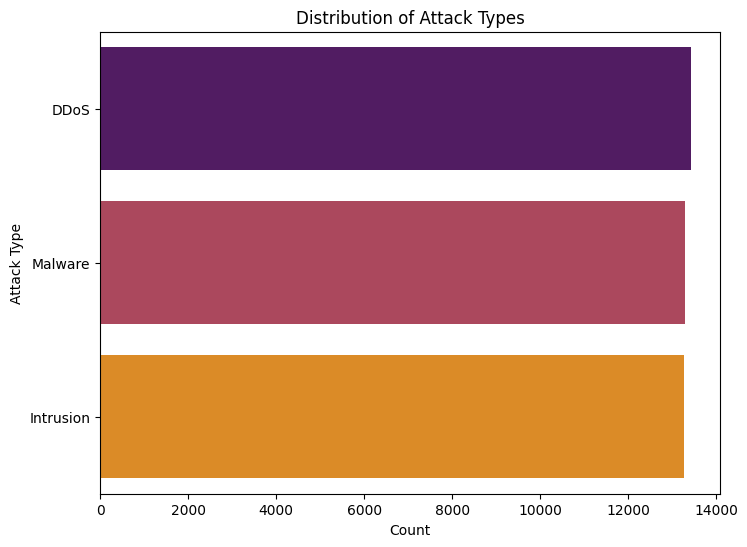


Attack Type distribution percentages:


,proportion
Attack Type,
DDoS,33.5700
Malware,33.2675
Intrusion,33.1625


In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, y='Attack Type', order=data['Attack Type'].value_counts().index, palette='inferno')
plt.title('Distribution of Attack Types')
plt.xlabel('Count')
plt.ylabel('Attack Type')
plt.show()

print("\nAttack Type distribution percentages:")
display(data['Attack Type'].value_counts(normalize=True) * 100)

##### 2. Protocol Usage

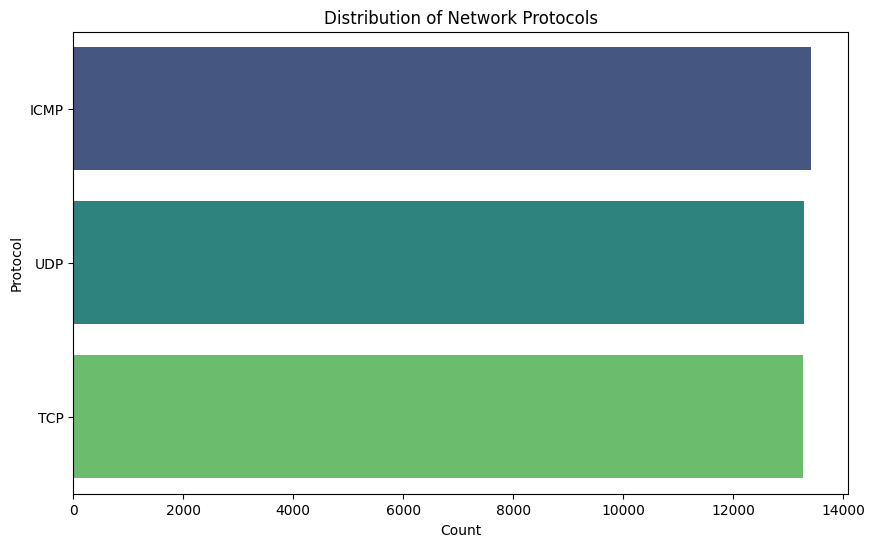


Protocol distribution percentages:


,proportion
Protocol,
ICMP,33.5725
UDP,33.2475
TCP,33.1800


In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, y='Protocol', order=data['Protocol'].value_counts().index, palette='viridis')
plt.title('Distribution of Network Protocols')
plt.xlabel('Count')
plt.ylabel('Protocol')
plt.show()

print("\nProtocol distribution percentages:")
display(data['Protocol'].value_counts(normalize=True) * 100)

 ##### Severity Levels

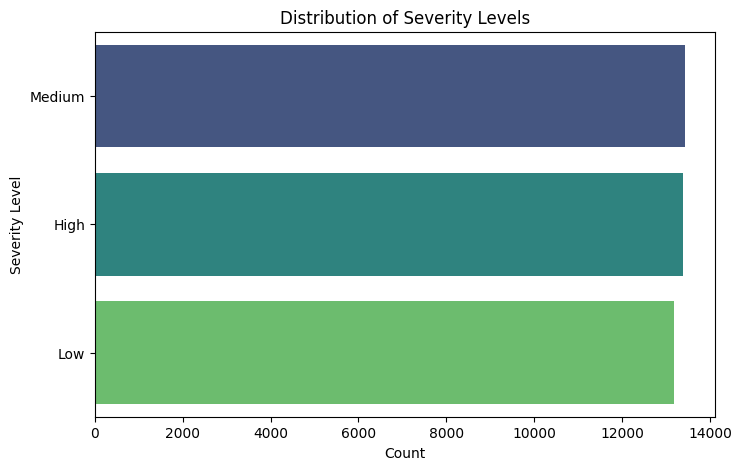

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, y='Severity Level', order=data['Severity Level'].value_counts().index, palette='viridis')
plt.title('Distribution of Severity Levels')
plt.xlabel('Count')
plt.ylabel('Severity Level')
plt.show()

##### 5. Packet Types

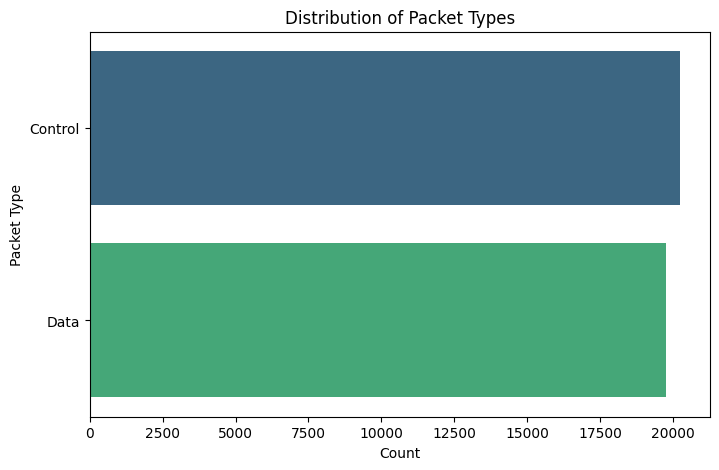

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, y='Packet Type', order=data['Packet Type'].value_counts().index, palette='viridis')
plt.title('Distribution of Packet Types')
plt.xlabel('Count')
plt.ylabel('Packet Type')
plt.show()

##### 6. Traffic Types

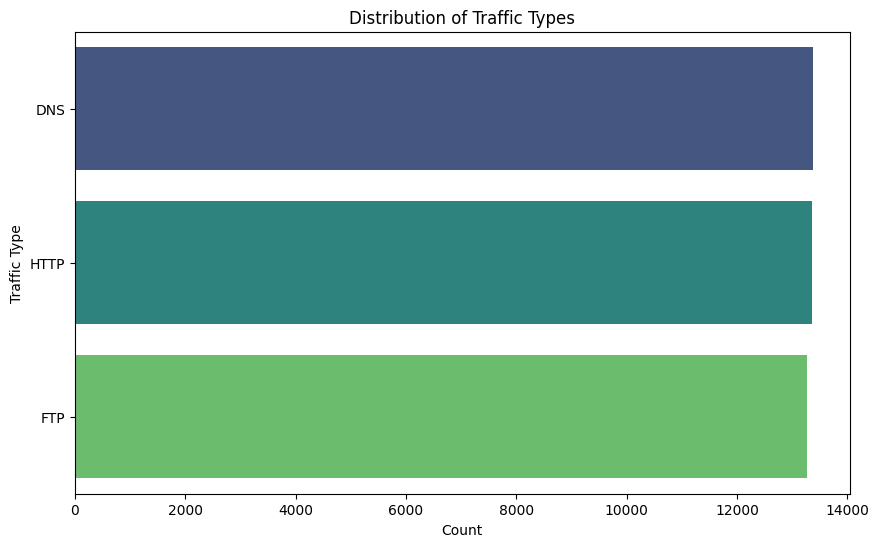

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='Traffic Type', order=data['Traffic Type'].value_counts().index, palette='viridis')
plt.title('Distribution of Traffic Types')
plt.xlabel('Count')
plt.ylabel('Traffic Type')
plt.show()

##### 6. Log Sources

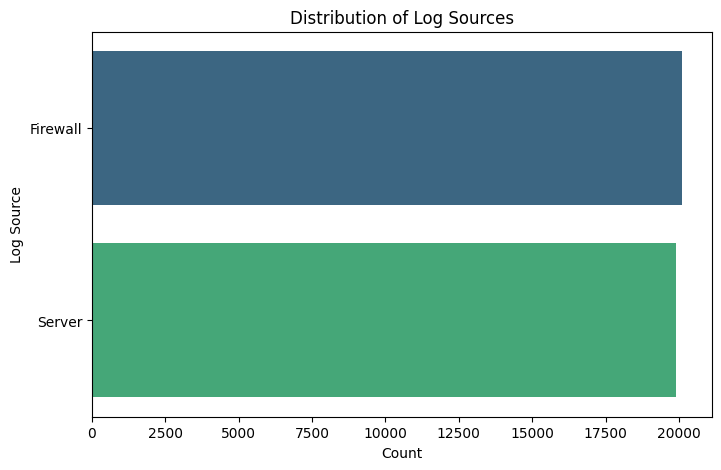

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, y='Log Source', order=data['Log Source'].value_counts().index, palette='viridis')
plt.title('Distribution of Log Sources')
plt.xlabel('Count')
plt.ylabel('Log Source')
plt.show()

##### 7. Packet Lengths

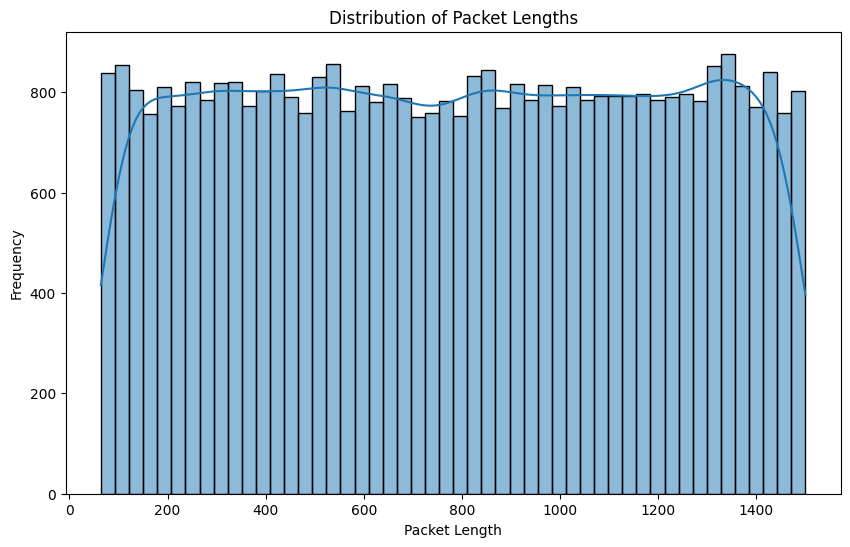

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Packet Length'], bins=50, kde=True)
plt.title('Distribution of Packet Lengths')
plt.xlabel('Packet Length')
plt.ylabel('Frequency')
plt.show()

### Correlation Matrix of Numerical Features

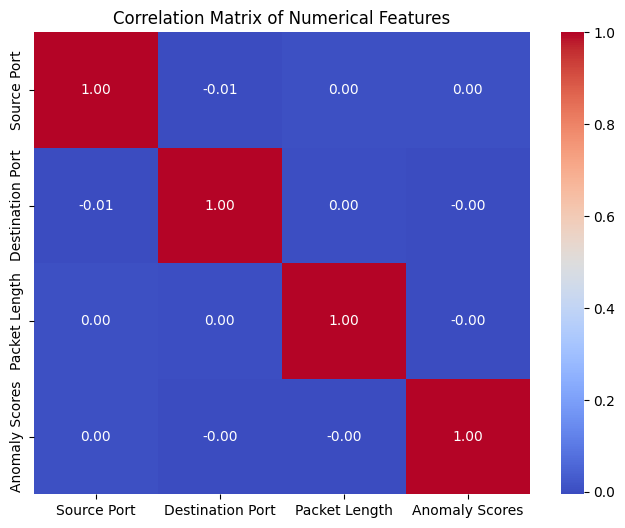

In [26]:
numerical_cols = ['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores']
correlation_matrix = data[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

We can infer from this matrix is that there is very little to no linear correlation between the numerical features **'Source Port', 'Destination Port', 'Packet Length', and 'Anomaly Scores'** in this dataset. This means that changes in one of these numerical features are not linearly associated with changes in the others.

This is a useful finding for model building, as it suggests that multicollinearity is not a significant issue among these specific numerical features.

### Summary of EDA Findings

Based on the analysis:

**Class Distributions and Class Balance:**
[Summarize findings from the Attack Type distribution plot and value counts here]

**Protocol Usage:**
[Summarize findings from the Protocol distribution plot and value counts here]

**Anomaly Score Trends:**
[Summarize findings from the Anomaly Score statistics and histogram here]